In [156]:
import numpy as np
import plotly.graph_objects as go
import math
import scipy.fft as scf

In [157]:
a  = 1
b = 1
alpha = 1
beta = 0
n = 50
L =16    
time = 1
x0 = 0
x1 = 0
c0=0
k = 1
#c=(3*alpha*b-a*beta)/(beta+0.0001) #убрать 0ю1
c=0
A=1
w = k**2+beta*k*A**2 - b*A**2

j = complex(0,1)

h =L/n
#μ = (2*b*alpha - a*b*beta)/(alpha*beta**2 + 0.1)# уюрать 0ю1
#ν = beta/(6*alpha + 0.1)#убрать 0ю1
tau = h*h/(2*np.pi)

#x = np.array([-L/2 + i*h for i in range(n)])
x = np.array([i*h for i in range(n)])

#мю 
mu = np.array([2*math.pi*complex(i,0)/(L) for i in range(int(-n/2),int(n/2))])
#mu = np.array([2*math.pi*complex(i,0)/(L) for i in range(int(n))])

L_tilda =alpha*mu**3 - a*mu**2


t = np.array([i*tau for i in range(int(time/tau))])
T,X = np.meshgrid(t,x)



In [158]:
def fft(W):
    a = np.array([])
    for m in mu:
        a = np.append(a,np.array([np.sum(W*np.exp(-j*m*x))/n]))
    return a
def ifft(W):
    a = np.array([])
    for xj in x:
        a = np.append(a, np.sum(W*np.exp(j*mu*xj)))
    
    return a

In [159]:

def Lu(u):

    return ifft(np.exp(j*L_tilda*tau)*(fft(u)))
def Nu(u):
     
     return np.exp(j*tau*(b*np.abs(u)**2 -1.75*np.abs(u)**4))*u #убрать коэффициенты 4 степени

def M2ps2(u):
     u_ = (scf.fft(u))
     
     return np.sum(np.array(
          [np.exp(-j*beta*tau*(np.abs(u)**2*mu[i]))
           *u_[i]
           *np.exp(j*mu[i]*x) 
           for i in range(len(mu))])/n**0.5,0)


def Bk(u):
     bs = np.zeros_like(mu)
     ut = np.fft.fftshift(scf.fft(u))
     utt = np.fft.fftshift(scf.fft(np.array([i.conjugate() for i in u])))
     for k1 in range(len(mu)):
          for k2 in range(len(mu)):
               for k3 in range(len(mu)):
                    if (k1-k2+k3<len(mu) and ut[k1-k2+k3]*mu[k1-k2+k3]!=0 and k1-k2+k3>=0) :
                         bs[k1-k2+k3] += ut[k1]*utt[k2]*ut[k3]*mu[k3]/(ut[k1-k2+k3]*mu[k1-k2+k3]) 
     bs = bs/n
     return bs

def M2psi1(u):
     bs = Bk(u)
     return scf.ifft(np.exp(-j*beta*tau*np.array([bs[i]*mu[i] for i in range(len(mu))]))*(scf.fft(u)))


def Dx(u,p):
     return 1/np.sqrt(n)*np.sum([(j*muk)**p*scf.fft(u)*np.exp(j*muk*x) for muk in mu],0)
def M2(u):
     return np.exp(c*j*tau*Dx(np.abs(u),2)/(np.abs(u)))*u



qm = 1
def M1_test(u):
    return np.exp(-2*qm*j*tau*np.imag(u*Dx(np.conjugate(u),1)))*u






def appr_solution(u):
    
     return Lu(((Nu(u))))

In [160]:
# def solution(x,t):
   
#     C0 = np.full_like(x, c0)
#     X0 = np.full_like(x,x0)
#     X1 = np.full_like(x,x1)
    
#     return (4*μ*np.exp(np.sqrt(μ)*(x - C0*t - X0))*np.exp(j*k*(x - C0*t - X1)))/(4*μ*ν+np.exp(2*np.sqrt(μ)*(x - C0*t - X0)))

In [161]:
def test_solution(x,t):
    return np.sqrt(4/(4+3*np.sinh(x-2*t-15)**2))*np.exp(j*(2/(np.tanh(0.5*np.tanh(x-2*t-15)))+x-15))



In [162]:
#sol = solution(X, T)
#print(sol.shape)

#u0 = 0.5*(1 + np.cos(np.pi*x/8))
u0 = np.ones(x.shape)
#u0 = np.sqrt(4/(4+3*np.sinh(x-15)**2))*np.exp(j*(2/(np.tanh(0.5*np.tanh(x-15)))+x-15))
appr_sol = []
#u0=np.transpose(sol)[0]
#u0 = A*np.exp(-j*k*x)
#print(u0.shape)
#print(Dx(u0,2))
#Bk(u0)
for i in t:
    appr_sol.append(u0)
    u0 = appr_solution(u0)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


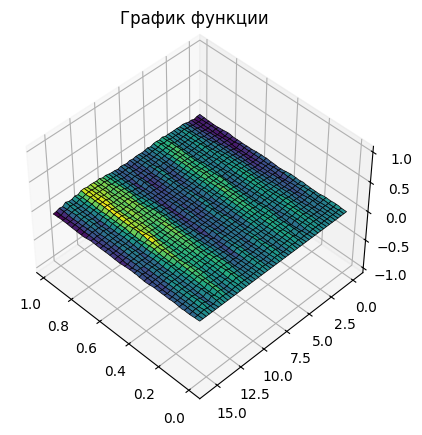

In [168]:
import matplotlib.pyplot as plt
def plot_surface(ax, x, y, z, title):
    ax.clear()
    ax.set_title(title)
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', linewidth=0.5)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,135)

T, X = np.meshgrid(t,x)
plot_surface(ax, T.transpose(), X.transpose(), np.abs(appr_sol)**2, title="График функции")


plt.show()

(61,) (61,)


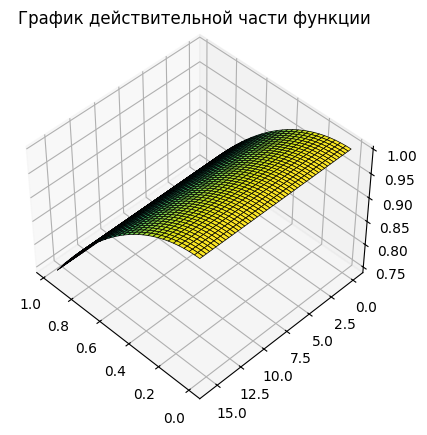

In [164]:
U = appr_sol
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,135)

T, X = np.meshgrid(t,x)
plot_surface(ax, T.transpose(), X.transpose(), np.real(U), title="График действительной части функции")

# Закон сохранения

print((np.sum(np.abs(U)*np.abs(U), axis = 1)).shape,t.shape)
plt.show()

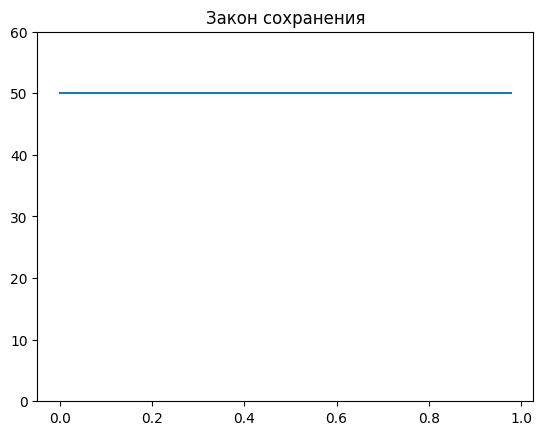

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111)

    

T, X = np.meshgrid(t,x)
ax.clear()
ax.set_title("Закон сохранения")
ax.set_ylim(0.,60)
#print(np.sum(np.abs(U)*np.abs(U),axis = 1))
ax.plot(t, np.sum(np.abs(U)*np.abs(U), axis = 1))
# Закон сохранения


plt.show()

In [166]:
fig = go.Figure(data=[go.Surface(z=np.real(appr_sol), x=X, y=T)])
fig.update_layout(title=dict(text='Equation Solve'), autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict(
                    xaxis = dict(title='x'),
                        
                    yaxis = dict(
                        title='t'),
                    zaxis = dict(
                        title='Z'),))
fig.show()

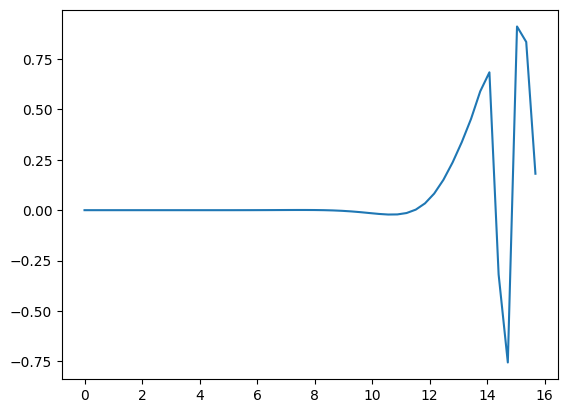

In [167]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
plt.plot(x,test_solution(x,0))
plt.show()